In [1]:
import scipy.io as sio
mat_file_path = 'data/rois/rois_3000_beijing/rois/tseries_rois_X_1050345_run1.mat'
mat_contents = sio.loadmat(mat_file_path)

In [2]:
print(mat_contents.keys())

dict_keys(['__header__', '__version__', '__globals__', 'tseries'])


In [3]:
for key in mat_contents:
    if not key.startswith('__'):
        print(f"Key: {key}")
        print(f"Type: {type(mat_contents[key])}")
        print(f"Shape: {mat_contents[key].shape}")
        print(f"Data: {mat_contents[key]}")


Key: tseries
Type: <class 'numpy.ndarray'>
Shape: (236, 2843)
Data: [[ 0.3861987  -0.94022208 -0.29422978 ... -0.71547425 -0.20517506
   0.26459217]
 [-0.14400031 -0.53705102  0.25125191 ... -0.91592664 -0.54579079
  -0.03357888]
 [-0.60032612 -0.02600817 -0.15472578 ... -1.2187084  -0.27101833
  -0.27129999]
 ...
 [-0.25936985  0.4864884   0.13093099 ...  0.13003813  0.00997439
   0.62194639]
 [ 1.51477242  0.172841   -0.1517794  ... -0.25621736  0.01792261
   0.34955117]
 [ 0.94964451  0.2120526  -0.08408482 ... -1.03644347 -0.23731184
   0.1033888 ]]


In [4]:
tseries = mat_contents['tseries']

# Verify the shape
print('tseries shape:', tseries.shape)

import numpy as np

# Compute the correlation matrix
correlation_matrix = np.corrcoef(tseries.T)

# Verify the shape
print('Correlation matrix shape:', correlation_matrix.shape)  # Should be (2843, 2843)


tseries shape: (236, 2843)
Correlation matrix shape: (2843, 2843)


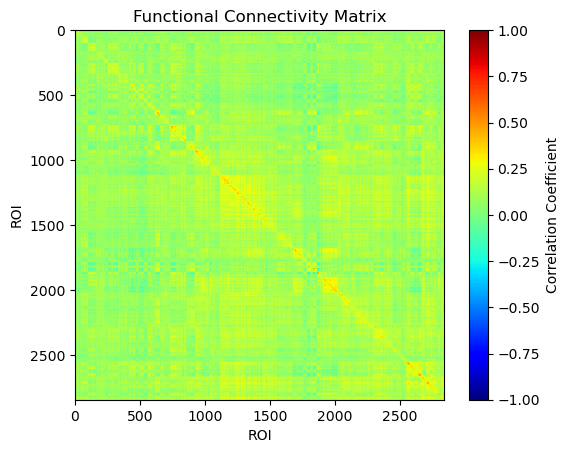

In [6]:
import matplotlib.pyplot as plt

plt.imshow(correlation_matrix, cmap='jet', vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient')
plt.title('Functional Connectivity Matrix')
plt.xlabel('ROI')
plt.ylabel('ROI')
plt.show()

In [8]:
import nibabel as nib

mnc_file_path = 'data/rois/rois_3000_beijing/rois/brain_atoms.mnc.gz'

# Load the MINC file
mnc_img = nib.load(mnc_file_path)


In [9]:
# Print basic information
print("Image shape:", mnc_img.shape)
print("Data type:", mnc_img.get_data_dtype())
print("Affine matrix:\n", mnc_img.affine)


Image shape: (46, 64, 53)
Data type: >f4
Affine matrix:
 [[   0.    0.    3.  -78.]
 [   0.    3.    0. -112.]
 [   3.    0.    0.  -50.]
 [   0.    0.    0.    1.]]


In [10]:
# Get the image data as a NumPy array
data = mnc_img.get_fdata()

# Find unique labels in the data
unique_labels = np.unique(data)
print("Unique labels in the image:", unique_labels)


Unique labels in the image: [0.000e+00 1.000e+00 2.000e+00 ... 2.841e+03 2.842e+03 2.843e+03]
